# Distribution Transform

- This notebook is based on Michael Pyrcz lecture about **Distribution Transform**. To check it, click on the link below:
  https://www.youtube.com/watch?v=ZDIpE3OkAIU&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=14&t=2s
<br>

- There are many reasons to transform data from a given distribution to another distribution, such as:
  - Suppose that we've sampled just a few data from a given variable and we have a prior knowledge about the shape of that variable distribution. Therefore, we may transform the raw data.

  - When we use specific techniques or workflows that require a specific statistical distribution, we must transform the raw data. For example, in order to perform Sequential Gaussian Simulation, we must transform the raw data into gaussian distributed data.
<br>

- A distribution transform may be applied to any parametric or non-parametric distribution. For example, we could transform a non-parametric distribution to a parametric distribution (e.g. Gaussian, Lognormal). In order to do it, we just need to map from one distribution to another through cumulative frequencies/percentiles
<br>

- In order to obtain the cumulative frequencies (Fx), we'll use the following equation, since we do are not sure about upper and lower tails:
<br>

<table>
  <tr>
    <td><b>Fx = sample index/(N+1)</b></td>
  </tr>
</table>
<br>
<br>


## To Gaussian Distribution Function

In [6]:
# Function that transform raw data to standard normally distributed data:

NScoreTransform <- function (data=NA){

  rank_sample <- rank(data)

  # Getting the cumulative frequencies:
  Fx <- rep(NA,length(rank_sample))
  for(i in seq_along(rank_sample)){
    Fx[i] <- rank_sample[i]/(length(rank_sample)+1)
  }

  # Getting the nscores:
  n_scores <- rep(NA,length(rank_sample))
  for(i in seq_along(rank_sample)){
    n_scores[i] <- qnorm(Fx[i])
  }

  return(n_scores)
}

### Example 1: Transforming Raw Cr(%) Data to Gaussian Distributed Data

<table align="center">
  <tr align="center">
    <td><b>Sample Index</b></td>
    <td><b>Cr(%)</b></td>
  </tr>
  <tr align="center">
    <td>1</td>
    <td>5</td>
  </tr>
  <tr align="center">
    <td>2</td>
    <td>7</td>
  </tr>
  <tr align="center">
    <td>3</td>
    <td>8</td>
  </tr>
  <tr align="center">
    <td>4</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>5</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>6</td>
    <td>10</td>
  </tr>
  <tr align="center">
    <td>7</td>
    <td>13</td>
  </tr>
  <tr align="center">
    <td>8</td>
    <td>15</td>
  </tr>
  <tr align="center">
    <td>9</td>
    <td>17</td>
  </tr>
  <tr align="center">
    <td>10</td>
    <td>29</td>
  </tr>
</table><br><br>

In [ ]:
# Variable Cr(%):
Cr <- c(8,7,5,29,17,15,9,13,9,10)

In [ ]:
# Cr(%) transformed:
Cr_nscores <- NScoreTransform(Cr)

In [ ]:
data.frame(Sample_Index=rank(Cr),Raw_Cr=Cr,NSCORES=Cr_nscores)

Sample_Index,Raw_Cr,NSCORES
<dbl>,<dbl>,<dbl>
3.0,8,-0.6045853
2.0,7,-0.9084579
1.0,5,-1.3351777
10.0,29,1.3351777
9.0,17,0.9084579
8.0,15,0.6045853
4.5,9,-0.2298841
7.0,13,0.3487557
4.5,9,-0.2298841


### Example 2: Tranforming Uniformly Distributed Data to Gaussian Distributed Data

In [ ]:
# Creating data uniformly distributed:
unif_data <- runif(1000)

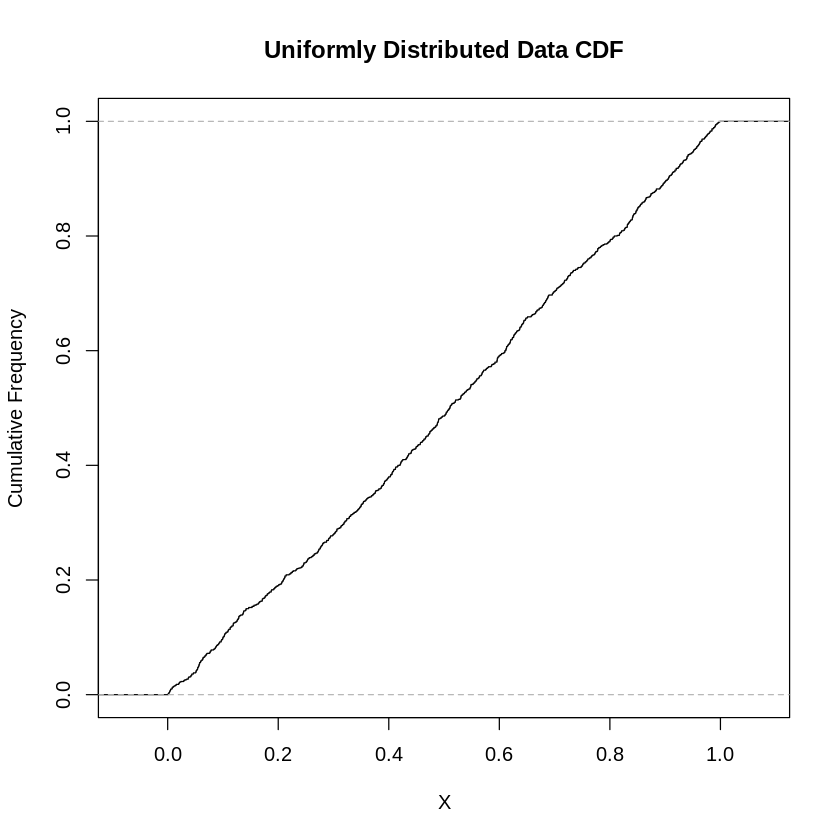

In [ ]:
# Plotting Uniformly Distributed Data CDF:
plot(ecdf(unif_data),
    main="Uniformly Distributed Data CDF",
    xlab="X",
    ylab="Cumulative Frequency")

In [ ]:
# Tranforming Uniformly Distributed Data to Gaussian Distributed Data:
unif_data_nscores <- NScoreTransform(unif_data)

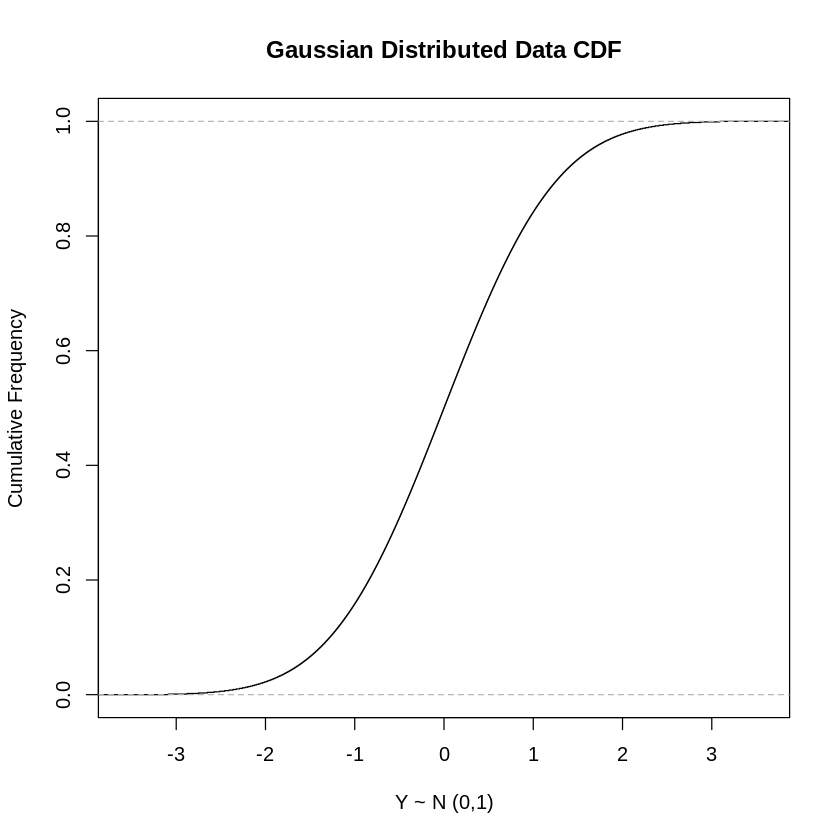

In [ ]:
# Plotting Gaussian Distributed Data CDF:
plot(ecdf(unif_data_nscores),
    main="Gaussian Distributed Data CDF",
    xlab="Y ~ N (0,1)",
    ylab="Cumulative Frequency")

## To Uniform Distribution Function

In [7]:
# Function that transform raw data to uniformy distributed data:

UScoreTransform <- function (data=NA){

  rank_sample <- rank(data)

  # Getting the cumulative frequencies:
  Fx <- rep(NA,length(rank_sample))
  for(i in seq_along(rank_sample)){
    Fx[i] <- rank_sample[i]/(length(rank_sample)+1)
  }

  # Getting the uniform scores:
  u_scores <- rep(NA,length(rank_sample))
  for(i in seq_along(rank_sample)){
    u_scores[i] <- qunif(Fx[i])
  }

  return(u_scores)
}

### Example 3: Transforming Raw Cr(%) Data to Uniformly Distributed Data

<table align="center">
  <tr align="center">
    <td><b>Sample Index</b></td>
    <td><b>Cr(%)</b></td>
  </tr>
  <tr align="center">
    <td>1</td>
    <td>5</td>
  </tr>
  <tr align="center">
    <td>2</td>
    <td>7</td>
  </tr>
  <tr align="center">
    <td>3</td>
    <td>8</td>
  </tr>
  <tr align="center">
    <td>4</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>5</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>6</td>
    <td>10</td>
  </tr>
  <tr align="center">
    <td>7</td>
    <td>13</td>
  </tr>
  <tr align="center">
    <td>8</td>
    <td>15</td>
  </tr>
  <tr align="center">
    <td>9</td>
    <td>17</td>
  </tr>
  <tr align="center">
    <td>10</td>
    <td>29</td>
  </tr>
</table><br><br>

In [18]:
# Variable Cr(%):
Cr <- c(8,7,5,29,17,15,9,13,9,10)

In [19]:
# Cr(%) transformed:
Cr_uscores <- UScoreTransform(Cr)

In [27]:
data.frame(Sample_Index=rank(Cr),Raw_Cr=Cr,USCORES=Cr_uscores)

Sample_Index,Raw_Cr,USCORES
<dbl>,<dbl>,<dbl>
3.0,8,0.27272727
2.0,7,0.18181818
1.0,5,0.09090909
10.0,29,0.90909091
9.0,17,0.81818182
8.0,15,0.72727273
4.5,9,0.40909091
7.0,13,0.63636364
4.5,9,0.40909091


### Example 4: Tranforming Gaussian Distributed Data to Uniformly Distributed Data 

In [21]:
# Creating data uniformly distributed:
norm_data <- rnorm(1000,mean=10,sd=2)

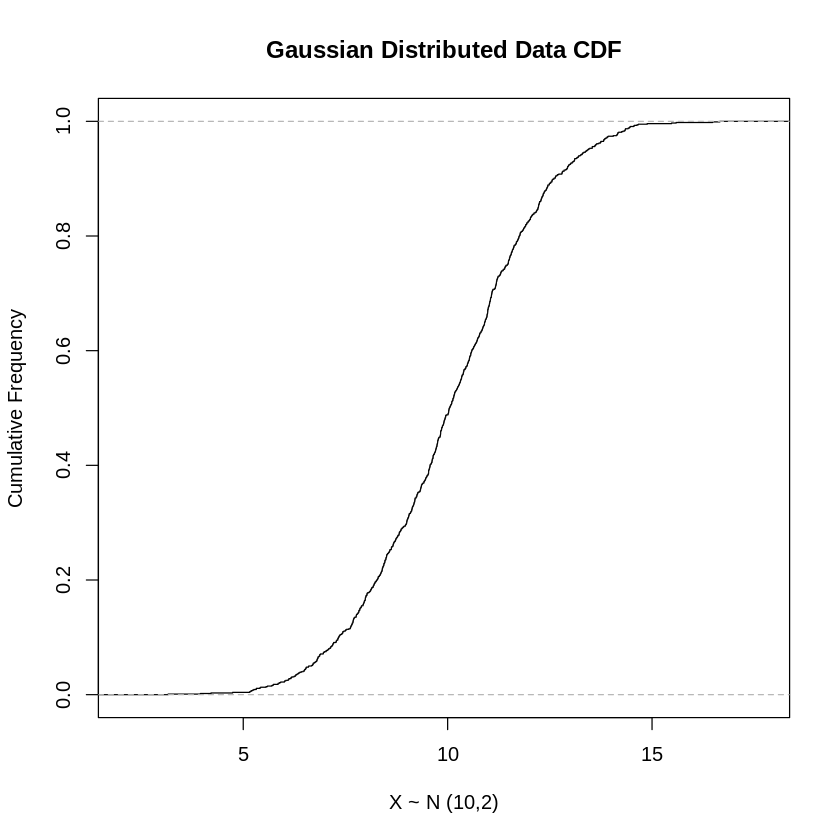

In [22]:
# Plotting Gaussian Distributed Data CDF:
plot(ecdf(norm_data),
    main="Gaussian Distributed Data CDF",
    xlab="X ~ N (10,2)",
    ylab="Cumulative Frequency")

In [23]:
# Tranforming Gaussian Distributed Data to Uniformly Distributed Data:
norm_data_uscores <- UScoreTransform(norm_data)

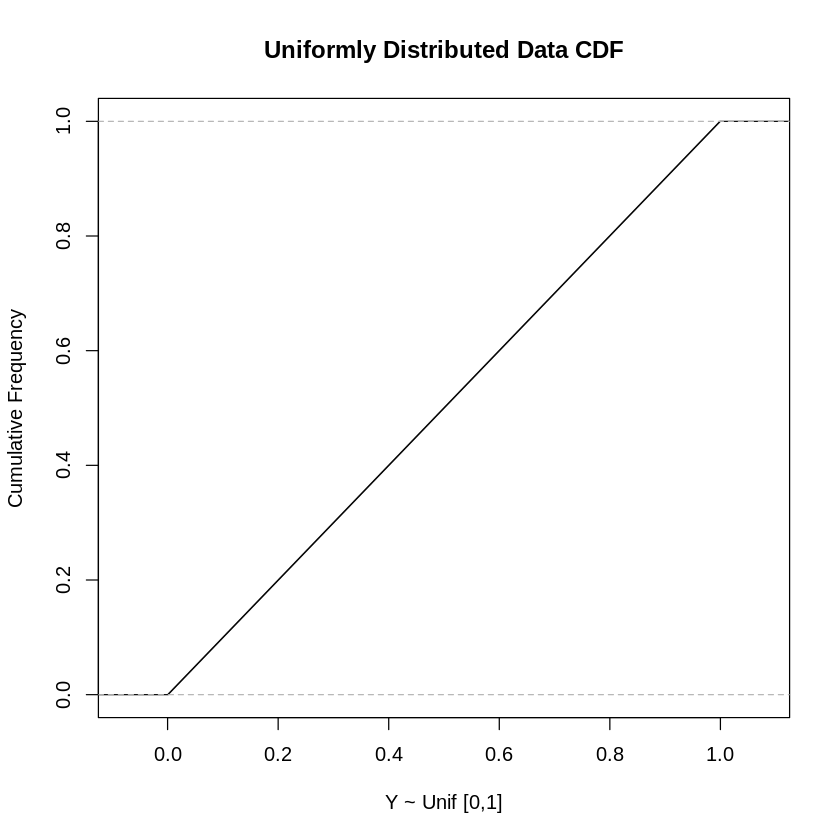

In [24]:
# Plotting Gaussian Distributed Data CDF:
plot(ecdf(norm_data_uscores),
    main="Uniformly Distributed Data CDF",
    xlab="Y ~ Unif [0,1]",
    ylab="Cumulative Frequency")

## To Lognormal Distribution Function

In [29]:
# Function that transform raw data to lognormally distributed data:

LNScoreTransform <- function (data=NA){

  rank_sample <- rank(data)

  # Getting the cumulative frequencies:
  Fx <- rep(NA,length(rank_sample))
  for(i in seq_along(rank_sample)){
    Fx[i] <- rank_sample[i]/(length(rank_sample)+1)
  }

  # Getting the uniform scores:
  ln_scores <- rep(NA,length(rank_sample))
  for(i in seq_along(rank_sample)){
    ln_scores[i] <- qlnorm(Fx[i])
  }

  return(ln_scores)
}

### Example 5: Transforming Raw Cr(%) Data to Lognormal Distributed Data

<table align="center">
  <tr align="center">
    <td><b>Sample Index</b></td>
    <td><b>Cr(%)</b></td>
  </tr>
  <tr align="center">
    <td>1</td>
    <td>5</td>
  </tr>
  <tr align="center">
    <td>2</td>
    <td>7</td>
  </tr>
  <tr align="center">
    <td>3</td>
    <td>8</td>
  </tr>
  <tr align="center">
    <td>4</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>5</td>
    <td>9</td>
  </tr>
  <tr align="center">
    <td>6</td>
    <td>10</td>
  </tr>
  <tr align="center">
    <td>7</td>
    <td>13</td>
  </tr>
  <tr align="center">
    <td>8</td>
    <td>15</td>
  </tr>
  <tr align="center">
    <td>9</td>
    <td>17</td>
  </tr>
  <tr align="center">
    <td>10</td>
    <td>29</td>
  </tr>
</table><br><br>

In [30]:
# Variable Cr(%):
Cr <- c(8,7,5,29,17,15,9,13,9,10)

In [31]:
# Cr(%) transformed:
Cr_lnscores <- LNScoreTransform(Cr)

In [32]:
data.frame(Sample_Index=rank(Cr),Raw_Cr=Cr,LNSCORES=Cr_lnscores)

Sample_Index,Raw_Cr,LNSCORES
<dbl>,<dbl>,<dbl>
3.0,8,0.5463009
2.0,7,0.4031454
1.0,5,0.2631114
10.0,29,3.8006714
9.0,17,2.4804943
8.0,15,1.8304930
4.5,9,0.7946257
7.0,13,1.4173029
4.5,9,0.7946257


### Example 6: Tranforming Uniformly Distributed Data to Lognormal Distributed Data

In [33]:
# Creating data uniformly distributed:
unif_data <- runif(1000)

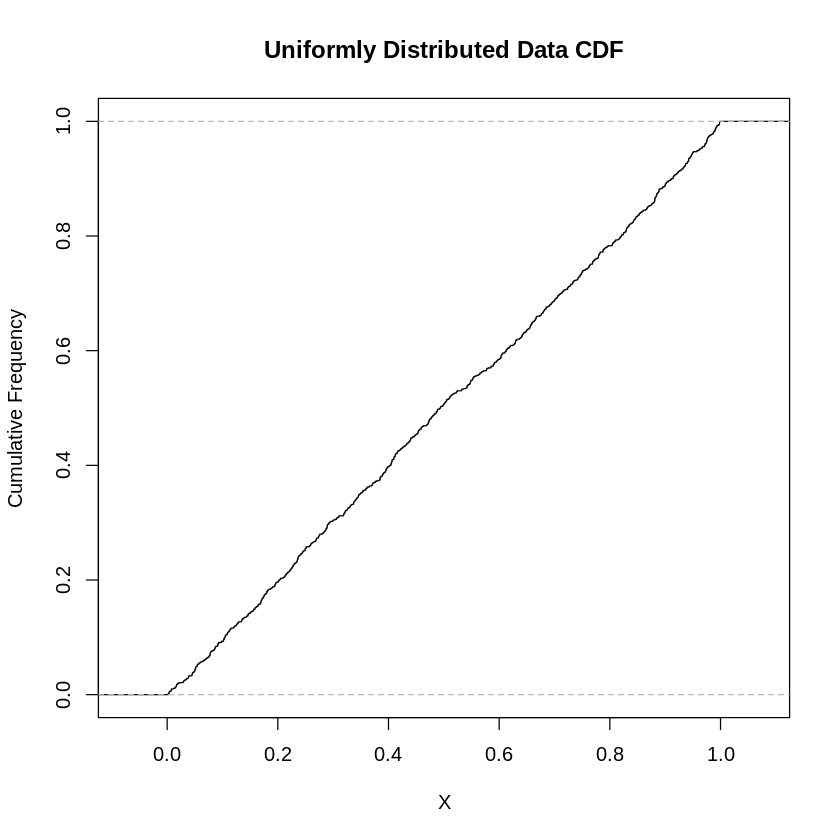

In [34]:
# Plotting Uniformly Distributed Data CDF:
plot(ecdf(unif_data),
    main="Uniformly Distributed Data CDF",
    xlab="X",
    ylab="Cumulative Frequency")

In [35]:
# Tranforming Uniformly Distributed Data to Lognormally Distributed Data:
unif_data_lnscores <- LNScoreTransform(unif_data)

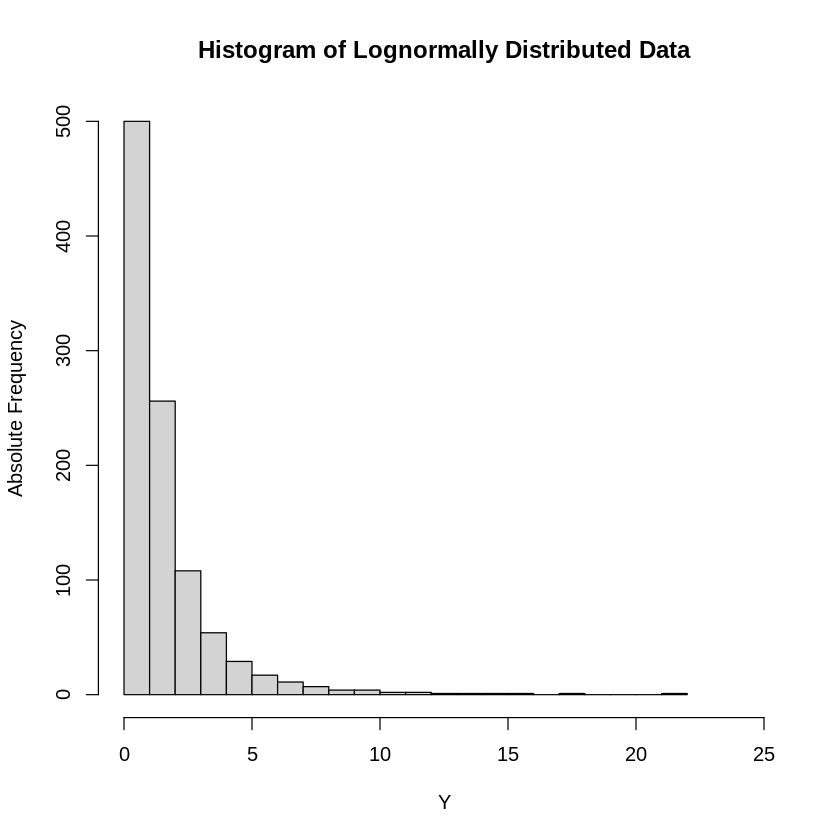

In [41]:
# Plotting Lognormally Distributed Data Histogram:
hist(unif_data_lnscores,
    main="Histogram of Lognormally Distributed Data",
    xlab="Y",
    xlim=c(0,25),
    ylab="Absolute Frequency",
    breaks=20)

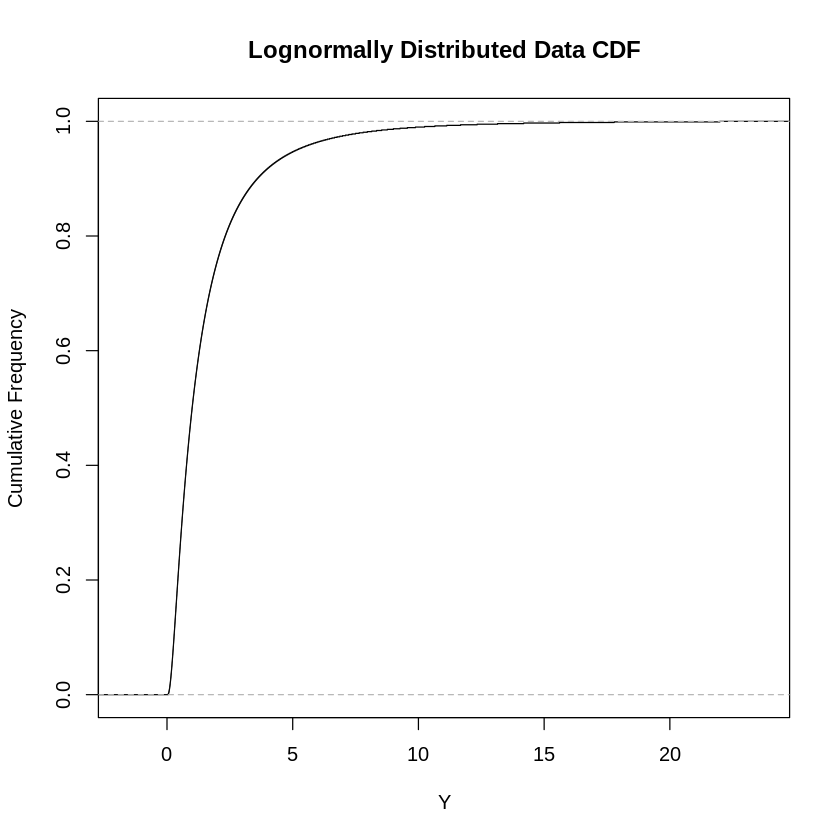

In [36]:
# Plotting Lognormally Distributed Data CDF:
plot(ecdf(unif_data_lnscores),
    main="Lognormally Distributed Data CDF",
    xlab="Y",
    ylab="Cumulative Frequency")